c:\users\shree\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


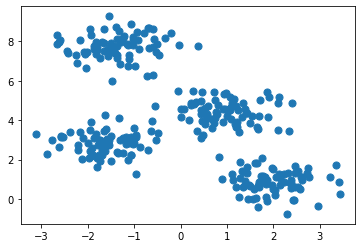

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
X,y_true=make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0],X[:,1],s=50)

In [2]:
kmn=KMeans(n_clusters=4)
kmn.fit(X)
y_kmn=kmn.predict(X)

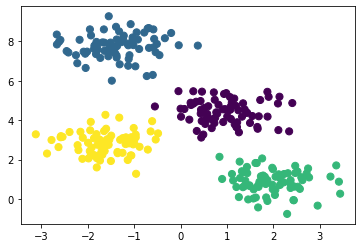

In [3]:
from sklearn.metrics import pairwise_distances_argmin
def find_clusters(X,n_clusters,rseed=2):
    #1. 
    rng=np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #2. Assign labels based on closest center
        labels = pairwise_distances_argmin(X,centers)
        
        #3. find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                               for i in range(n_clusters)])
        #4 check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers,labels
centers,labels = find_clusters(X, 4)
plt.scatter(X[:,0],X[:,1],c=labels,
            s=50, cmap='viridis')

# K-Means for Color Compression

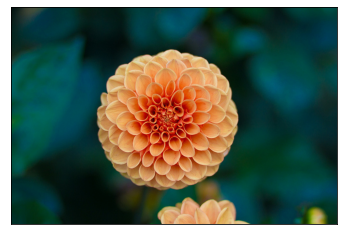

In [4]:
from sklearn.datasets import load_sample_image
china = load_sample_image('flower.jpg')
ax = plt.axes(xticks = [],yticks=[])
ax.imshow(china)

In [5]:
china.shape

(427, 640, 3)

In [6]:
data = china/255.0 #To convert in RGB format
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [7]:
def plot_pixels(data,title,colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors =colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green', xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue', xlim=(0,1),ylim=(0,1))
    fig.suptitle(title, size=20)

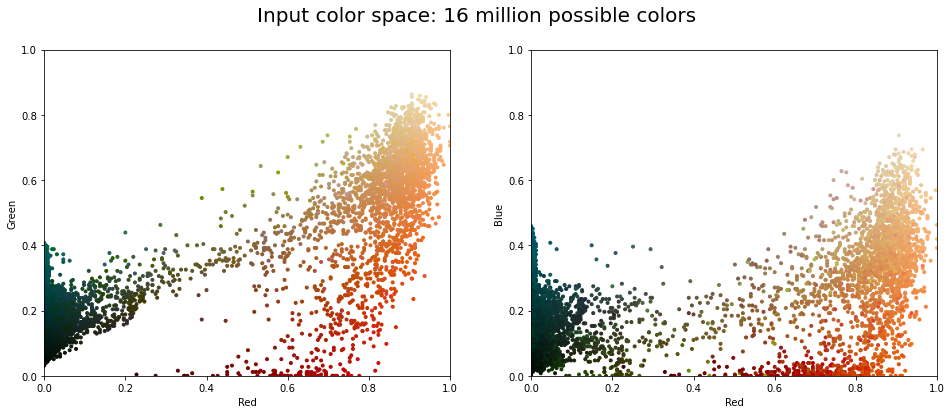

In [8]:
plot_pixels(data,title="Input color space: 16 million possible colors")

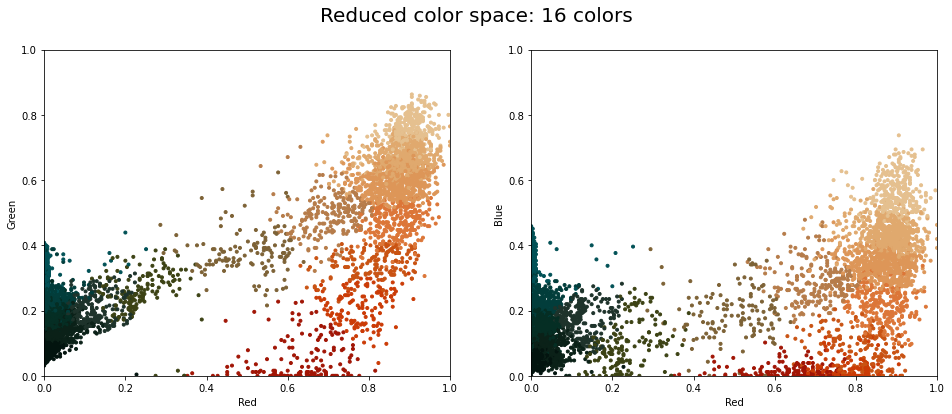

In [9]:
import warnings;warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmns=MiniBatchKMeans(16)
kmns.fit(data)
new_colors=kmns.cluster_centers_[kmns.predict(data)]
plot_pixels(data,colors=new_colors,
           title="Reduced color space: 16 colors")

Text(0.5, 1.0, '16-color Image')

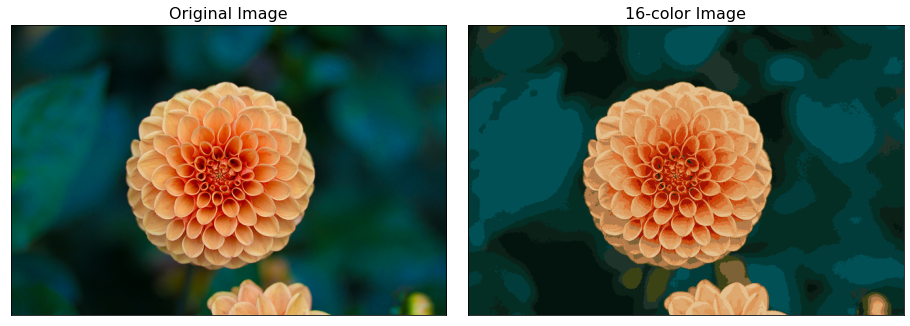

In [10]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize = (16,6),
                      subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)

# Example 2

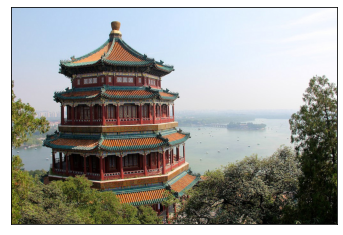

In [11]:
from sklearn.datasets import load_sample_image
china = load_sample_image('china.jpg')
ax = plt.axes(xticks = [],yticks=[])
ax.imshow(china)

In [12]:
data = china/255.0
data = data.reshape(427*640,3)
data.shape

(273280, 3)

In [13]:
def plot_pixels(data,title,colors=None, N=10000):
    if colors is None:
        colors = data
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors =colors[i]
    R,G,B = data[i].T
    
    fig,ax = plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G,color=colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green', xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,B,color=colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Blue', xlim=(0,1),ylim=(0,1))
    fig.suptitle(title, size=20)

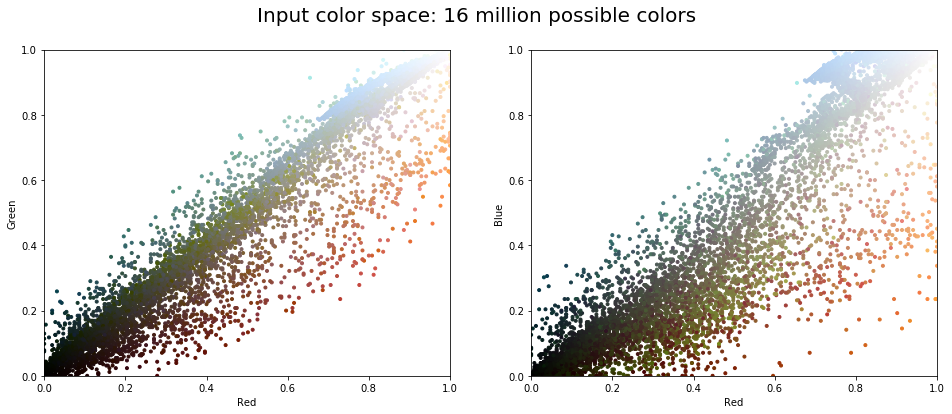

In [25]:
plot_pixels(data,title="Input color space: 16 million possible colors")

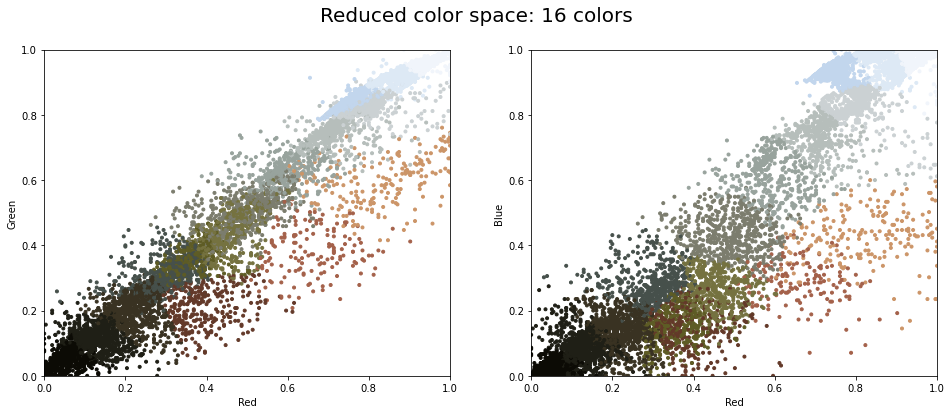

In [14]:
import warnings;warnings.simplefilter('ignore')
from sklearn.cluster import MiniBatchKMeans
kmns=MiniBatchKMeans(16)
kmns.fit(data)
new_colors=kmns.cluster_centers_[kmns.predict(data)]
plot_pixels(data,colors=new_colors,
           title="Reduced color space: 16 colors")

Text(0.5, 1.0, '16-color Image')

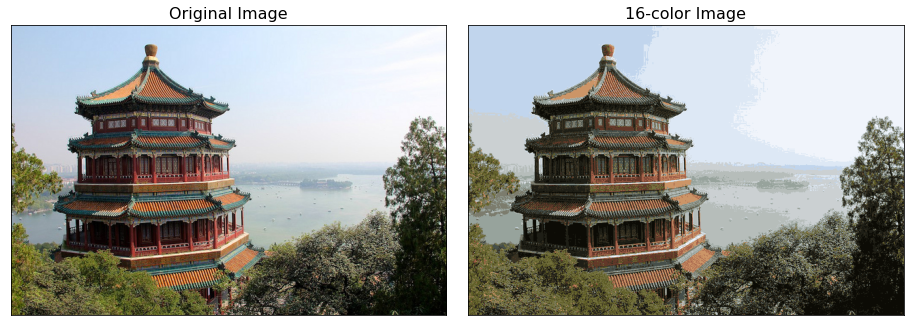

In [15]:
china_recolored = new_colors.reshape(china.shape)
fig, ax = plt.subplots(1,2, figsize = (16,6),
                      subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(china)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)